In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math 


In [2]:
df = pd.read_csv("churn_modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.shape

(10000, 14)

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

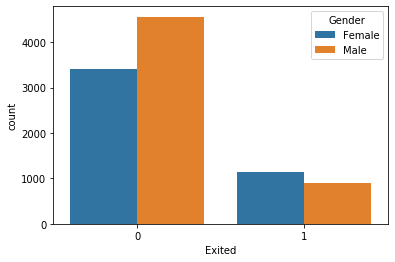

In [9]:
sns.countplot(df['Exited'],hue = df['Gender'],data = df)

In [10]:
geography = pd.get_dummies(df['Geography'],drop_first = True)

In [11]:
gender = pd.get_dummies(df['Gender'],drop_first = True)

In [12]:
df.drop(df[["Geography","Gender"]],axis = 1 , inplace = True)

In [13]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0


In [22]:
dataset = pd.concat([df,geography,gender],axis = 1)

In [23]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [24]:
X = dataset[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male']]

In [25]:
y = dataset['Exited']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.25 , random_state = 0)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc = StandardScaler()

In [33]:
X_train = sc.fit_transform(X_train)

In [34]:
X_test  = sc.transform(X_test)

In [35]:
X_train

array([[-0.73550706,  0.01526571,  0.00886037, ...,  1.76021608,
        -0.57468161, -1.08726059],
       [ 1.02442719, -0.65260917,  0.00886037, ..., -0.56811207,
        -0.57468161, -1.08726059],
       [ 0.80829492, -0.46178778,  1.39329338, ..., -0.56811207,
         1.74009395, -1.08726059],
       ...,
       [ 0.90092304, -0.36637708,  0.00886037, ..., -0.56811207,
        -0.57468161,  0.91974271],
       [-0.62229491, -0.08014499,  1.39329338, ..., -0.56811207,
         1.74009395, -1.08726059],
       [-0.28265848,  0.87396199, -1.37557264, ...,  1.76021608,
        -0.57468161, -1.08726059]])

In [36]:
X_test

array([[-0.55025082, -0.36637708,  1.04718513, ...,  1.76021608,
        -0.57468161, -1.08726059],
       [-1.31185979,  0.11067641, -1.02946438, ..., -0.56811207,
        -0.57468161, -1.08726059],
       [ 0.57157862,  0.3014978 ,  1.04718513, ..., -0.56811207,
         1.74009395, -1.08726059],
       ...,
       [ 1.95070838,  0.01526571, -1.37557264, ..., -0.56811207,
        -0.57468161, -1.08726059],
       [ 0.29369426, -0.08014499,  0.70107688, ...,  1.76021608,
        -0.57468161,  0.91974271],
       [ 0.870047  , -0.74801987, -0.68335613, ..., -0.56811207,
        -0.57468161,  0.91974271]])

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
lr = LogisticRegression()

In [39]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_predict = lr.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,y_predict)

0.8068

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,y_predict)

array([[1901,   90],
       [ 393,  116]], dtype=int64)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
DT = DecisionTreeClassifier(criterion = 'entropy')

In [52]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
DT_predict = DT.predict(X_test)

In [54]:
accuracy_score(y_test,DT_predict)

0.7952

In [55]:
import keras

Using TensorFlow backend.
C:\Users\AASHU\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\AASHU\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\AASHU\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\AASHU\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [56]:
from keras.layers import Dense

In [58]:
from keras.models import Sequential

In [59]:
from keras.layers import Dropout

In [60]:
from keras.layers import LeakyReLU , ELU 

In [62]:
classifier = Sequential()

In [83]:
classifier.add(Dense(units = 6 , kernel_initializer = 'he_uniform',activation = 'relu',input_dim = 11))

In [84]:
classifier.add(Dense(units = 6 , kernel_initializer = 'he_uniform',activation = 'relu'))

In [86]:
classifier.add(Dense(units = 1 , kernel_initializer = 'glorot_uniform',activation = 'sigmoid'))

In [87]:
classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [88]:
model_history = classifier.fit(X_train , y_train , validation_split = 0.35 , batch_size = 10 , epochs = 100)

Train on 4875 samples, validate on 2625 samples
Epoch 1/100
4875/4875 [==============================] - 3s 686us/step - loss: 0.5797 - accuracy: 0.7785 - val_loss: 0.5081 - val_accuracy: 0.7958
Epoch 2/100
4875/4875 [==============================] - 2s 415us/step - loss: 0.5057 - accuracy: 0.7965 - val_loss: 0.5062 - val_accuracy: 0.7958
Epoch 3/100
4875/4875 [==============================] - 2s 393us/step - loss: 0.5055 - accuracy: 0.7965 - val_loss: 0.5062 - val_accuracy: 0.7958
Epoch 4/100
4875/4875 [==============================] - 2s 419us/step - loss: 0.5055 - accuracy: 0.7965 - val_loss: 0.5062 - val_accuracy: 0.7958
Epoch 5/100
4875/4875 [==============================] - 2s 394us/step - loss: 0.5055 - accuracy: 0.7965 - val_loss: 0.5064 - val_accuracy: 0.7958
Epoch 6/100
4875/4875 [==============================] - 2s 392us/step - loss: 0.5056 - accuracy: 0.7965 - val_loss: 0.5062 - val_accuracy: 0.7958
Epoch 7/100
4875/4875 [==============================] - 2s 392us/step

4875/4875 [==============================] - 2s 412us/step - loss: 0.5054 - accuracy: 0.7965 - val_loss: 0.5062 - val_accuracy: 0.7958
Epoch 57/100
4875/4875 [==============================] - 2s 415us/step - loss: 0.5053 - accuracy: 0.7965 - val_loss: 0.5063 - val_accuracy: 0.7958
Epoch 58/100
4875/4875 [==============================] - 2s 412us/step - loss: 0.5055 - accuracy: 0.7965 - val_loss: 0.5062 - val_accuracy: 0.7958
Epoch 59/100
4875/4875 [==============================] - 2s 416us/step - loss: 0.5055 - accuracy: 0.7965 - val_loss: 0.5062 - val_accuracy: 0.7958
Epoch 60/100
4875/4875 [==============================] - 2s 418us/step - loss: 0.5054 - accuracy: 0.7965 - val_loss: 0.5064 - val_accuracy: 0.7958
Epoch 61/100
4875/4875 [==============================] - 2s 418us/step - loss: 0.5056 - accuracy: 0.7965 - val_loss: 0.5062 - val_accuracy: 0.7958
Epoch 62/100
4875/4875 [==============================] - 2s 423us/step - loss: 0.5055 - accuracy: 0.7965 - val_loss: 0.5062 

# I am loving this deep learning training 